In [5]:
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist

import matplotlib.pyplot as plt

In [16]:
# Function which returns string containing contents of .txt file at file_path
def txt_file_to_string(file_path):  
    with open(file_path, "r", encoding = "utf8") as curr:
        text = curr.read()
        text = text.replace("\n", " ").replace("\r", " ")
    return text

In [17]:
# Book 1 is Pride and Prejudice stored in string B1
book_one_path = "E:/Pride and Prejudice.txt"
Original_B1 = txt_file_to_string(book_one_path)
Original_B1

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: Pride and Prejudice  Author: Jane Austen  Release Date: June, 1998 [eBook #1342] [Most recently updated: August 23, 2021]  Language: English  Character set encoding: UTF-8  Produced by: Anonymous Volunteers and David Widger  *** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***     THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK [# 42671 ]  cover     Pride and Prejudice  By Jane Austen  CONTENTS    Chapter 1    Chapter 2    Chapter 3    Chap

In [18]:
# Book 2 is The Adventures of Sherlock Holmes stored in string B2
book_two_path = "E:/The Adventures of Sherlock Holmes.txt"
Original_B2 = txt_file_to_string(book_two_path)
Original_B2

'The Project Gutenberg eBook of The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Adventures of Sherlock Holmes  Author: Arthur Conan Doyle  Release Date: November 29, 2002 [eBook #1661] [Most recently updated: May 20, 2019]  Language: English  Character set encoding: UTF-8  Produced by: an anonymous Project Gutenberg volunteer and Jose Menendez  *** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***  cover     The Adventures of Sherlock Holmes  by Arthur Conan Doyle   Contents     I.     A Scandal in Bohemi

In [19]:
#Function to do basic pre-processing on the text
def pre_process(str):
    
    # Removing prefix and suffix to narrow down to text from Book
    start_index = str.find('*** START OF THE PROJECT ')
    end_index = str.find('*** END OF THE PROJECT ')
    str = str[start_index:end_index]

    # Expanding some Contractions
    str = re.sub(r"won\'t", "will not", str)
    str = re.sub(r"can\'t", "can not", str)

    # Expanding more Contractions according to general assumption
    str = re.sub(r"n\'t", " not", str)
    str = re.sub(r"\'re", " are", str)
    str = re.sub(r"\'s", " is", str)
    str = re.sub(r"\'d", " would", str)
    str = re.sub(r"\'ll", " will", str)
    str = re.sub(r"\'t", " not", str)
    str = re.sub(r"\'ve", " have", str)
    str = re.sub(r"\'m", " am", str)

    #Removing chapter number headings if any
    str = re.sub(r"Chapter [0-9]{1,3}", "", str)
    str = re.sub(r"CHAPTER", "", str)
    
    # Replacing one or more continuous whitespace characters by space
    str = re.sub(r"[\s]+", " ", str)
    
    return str

In [20]:
# Pre-processing B1
B1 = pre_process(Original_B1)
B1

'*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE *** THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK [# 42671 ] cover Pride and Prejudice By Jane Austen CONTENTS It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do not you want to know who has taken it?” cried his wife impatiently. “_You_ want to tell me, and I have no objection to hearing it.” This was invitation eno

In [21]:
# Pre-processing B2
B2 = pre_process(Original_B2)
B2

'*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES *** cover The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents I. A Scandal in Bohemia II. The Red-Headed League III. A Case of Identity IV. The Boscombe Valley Mystery V. The Five Orange Pips VI. The Man with the Twisted Lip VII. The Adventure of the Blue Carbuncle VIII. The Adventure of the Speckled Band IX. The Adventure of the Engineer’s Thumb X. The Adventure of the Noble Bachelor XI. The Adventure of the Beryl Coronet XII. The Adventure of the Copper Beeches I. A SCANDAL IN BOHEMIA I. To Sherlock Holmes she is always _the_ woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the

In [22]:
# Funtion for POS_Tagging of Book parameter which is of string type
def POS_Tagging(Book):
    words= [word_tokenize(i) for i in sent_tokenize(Book)]
    pos_tag= [nltk.pos_tag(i) for i in words]
    return pos_tag

In [23]:
# Function which extracts and returns lists of nouns and verbs in the Book whose pos_tag is given as parameter 
def extract_nouns_and_verbs(pos_tag):
    nouns = set()
    verbs = set()
    for sent in pos_tag:
        for word, tag in sent:

            word = word.lower()
            word = re.sub(r"[^\w\s]", "", word)
            word = re.sub(r"_", "", word)
            wordnet_cat = wordnet.NOUN

            if tag[0] == 'J':
                wordnet_cat = wordnet.ADJ
            elif tag[0] == 'V':
                wordnet_cat = wordnet.VERB
            elif tag[0] == 'N':
                wordnet_cat = wordnet.NOUN
            elif tag[0] == 'R':
                wordnet_cat = wordnet.ADV

            lemmatizer = WordNetLemmatizer()
            word = lemmatizer.lemmatize(word, wordnet_cat)

            if(tag[0] == 'N'):
                nouns.add(word)
            elif(tag[0] == 'V'):
                verbs.add(word)
    return list(nouns), list(verbs)

In [24]:
# Tagging B1 and extracting nouns and verbs in it
Tagged_B1 = POS_Tagging(B1)
Nouns_B1, Verbs_B1 = extract_nouns_and_verbs(Tagged_B1)

# Tagging B2 and extracting nouns and verbs in it
Tagged_B2 = POS_Tagging(B2)
Nouns_B2, Verbs_B2 = extract_nouns_and_verbs(Tagged_B2)

In [25]:
# Function to plot histograms of frequencies of different categories of nouns and verbs in the novel
def plot_for_frquency_distribution(fd, title):
    data = {}
    for i in fd.keys():
        j = i[5:] # Removing prefix of type "noun." OR "verb."
        if j not in data.keys():
            data[j] = fd[i]
        else:
            data[j] += fd[i]

    X = []
    Y = []

    for i in data.keys():
        X.append(i)
    for i in X:
        Y.append(data[i])

    # Plotting a bar graph for recorded data

    plt.figure(figsize = (20, 20))
    font = {'family':'serif','color':'darkred','size':25}
    plt.bar(X, Y, tick_label=X, width=0.8, color=['blue'])
    plt.xlabel('Category in WordNet', fontdict = font)
    plt.ylabel('Frequency', fontdict = font)
    plt.xticks(rotation=90)
    plt.title(title, fontdict = font, loc = "center")
    plt.show()

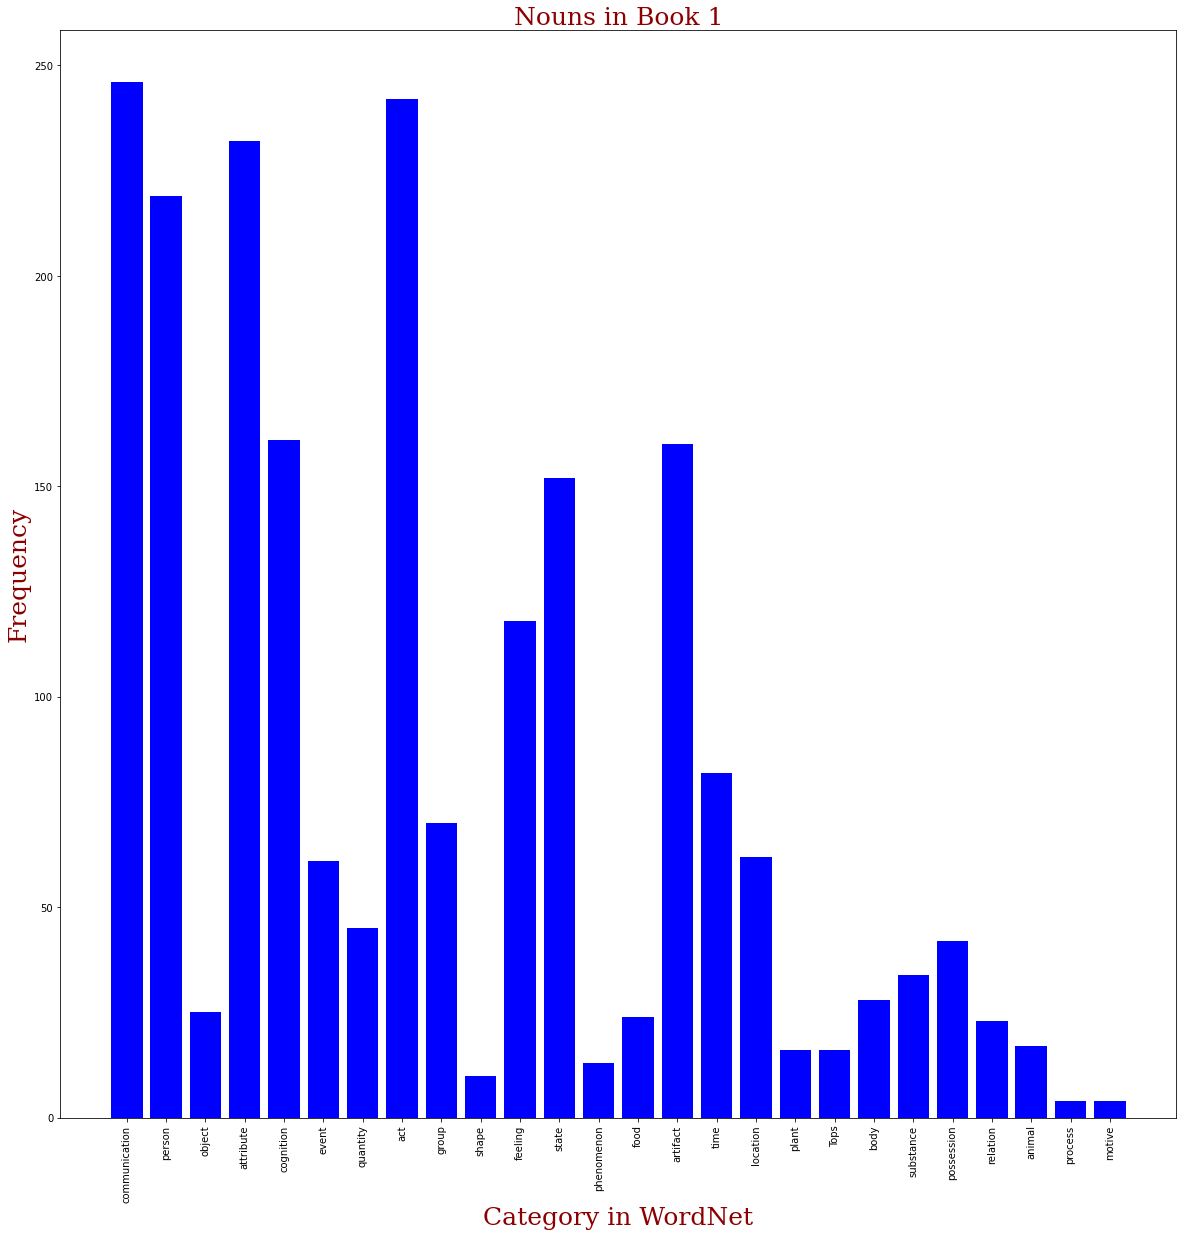

In [26]:
category_list = []
for word in Nouns_B1:
    syn = wordnet.synsets(word, pos = wordnet.NOUN)
    if len(syn) > 0:
        category_list.append(syn[0].lexname())

plot_for_frquency_distribution(FreqDist(category_list), "Nouns in Book 1")

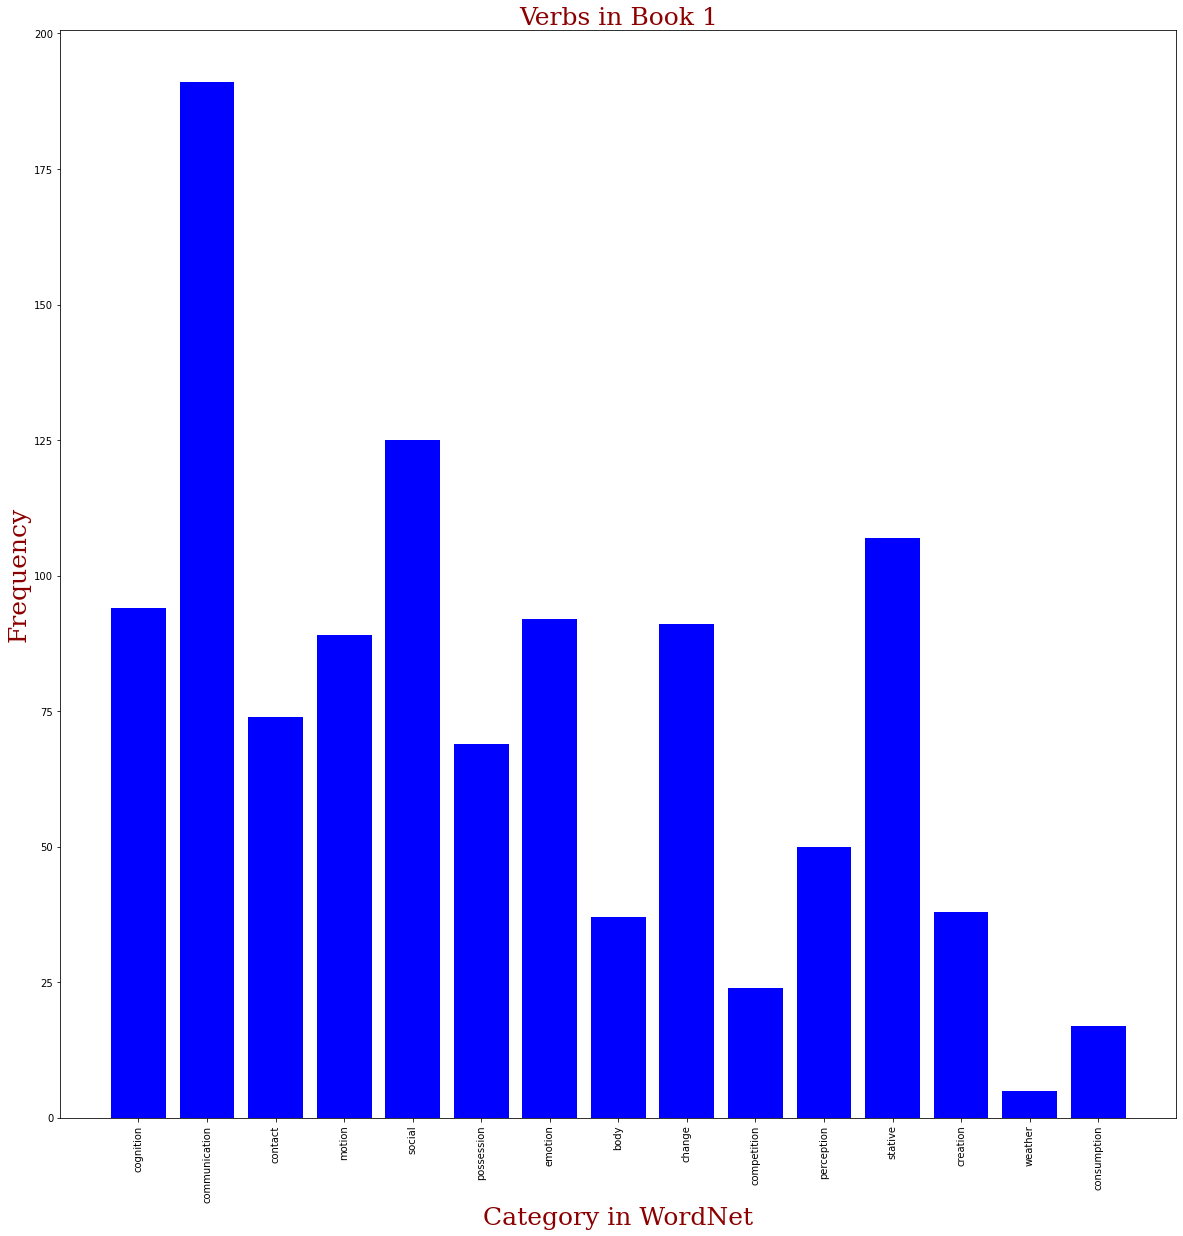

In [27]:
category_list = []
for word in Verbs_B1:
    syn = wordnet.synsets(word, pos = wordnet.VERB)
    if len(syn) > 0:
        category_list.append(syn[0].lexname())

plot_for_frquency_distribution(FreqDist(category_list), "Verbs in Book 1")

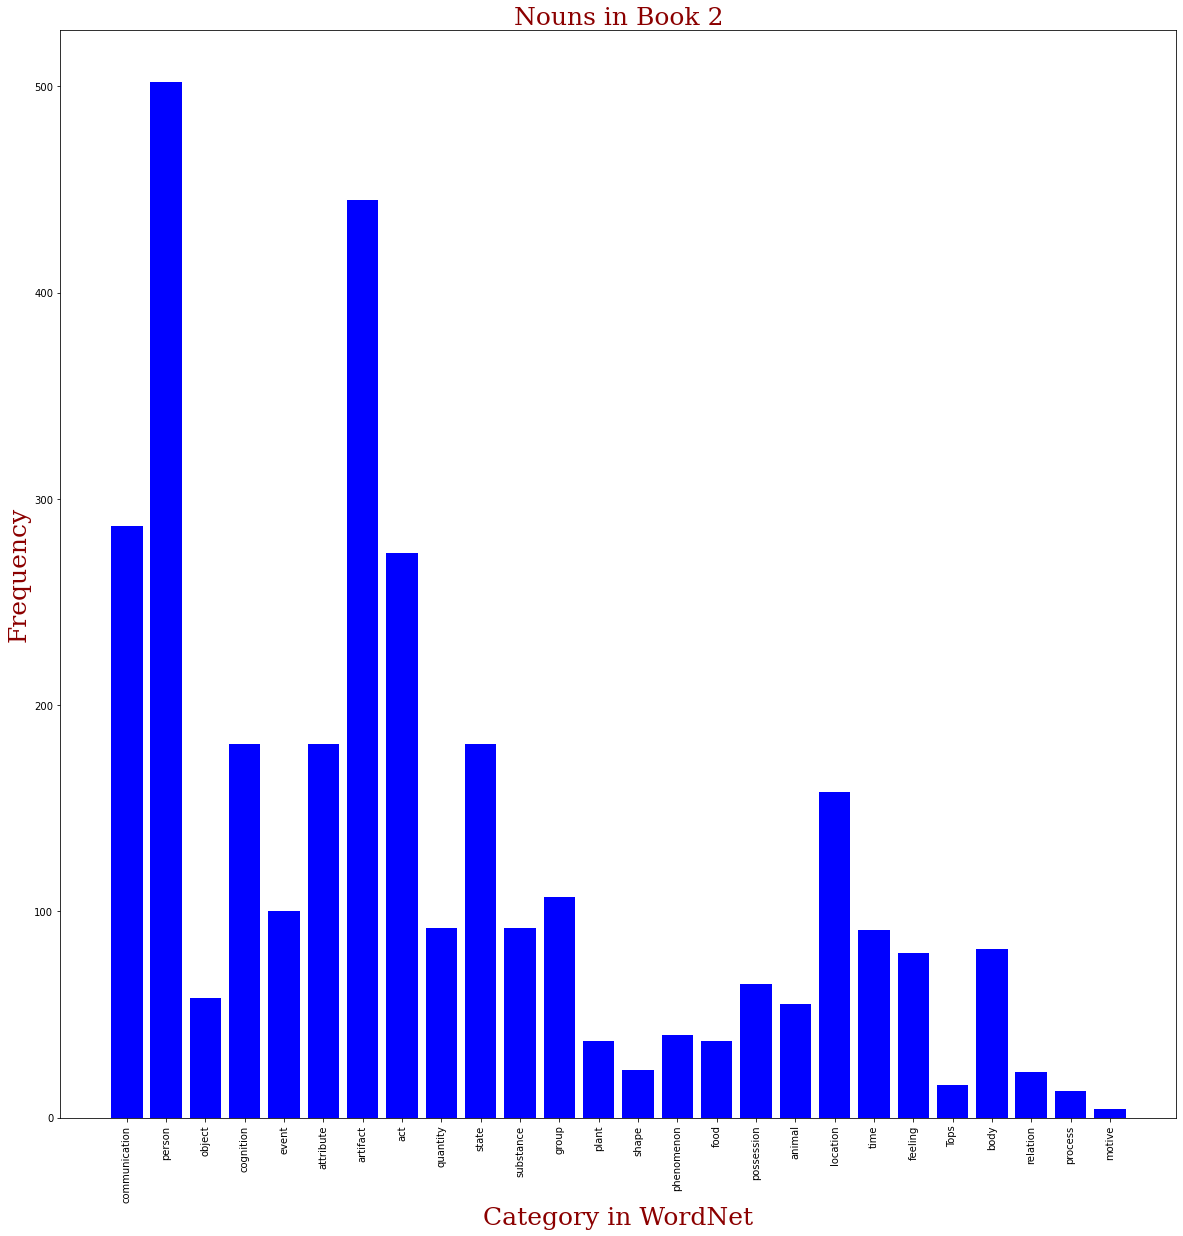

In [28]:
category_list = []
for word in Nouns_B2:
    syn = wordnet.synsets(word, pos = wordnet.NOUN)
    if len(syn) > 0:
        category_list.append(syn[0].lexname())
# category_list
plot_for_frquency_distribution(FreqDist(category_list), "Nouns in Book 2")

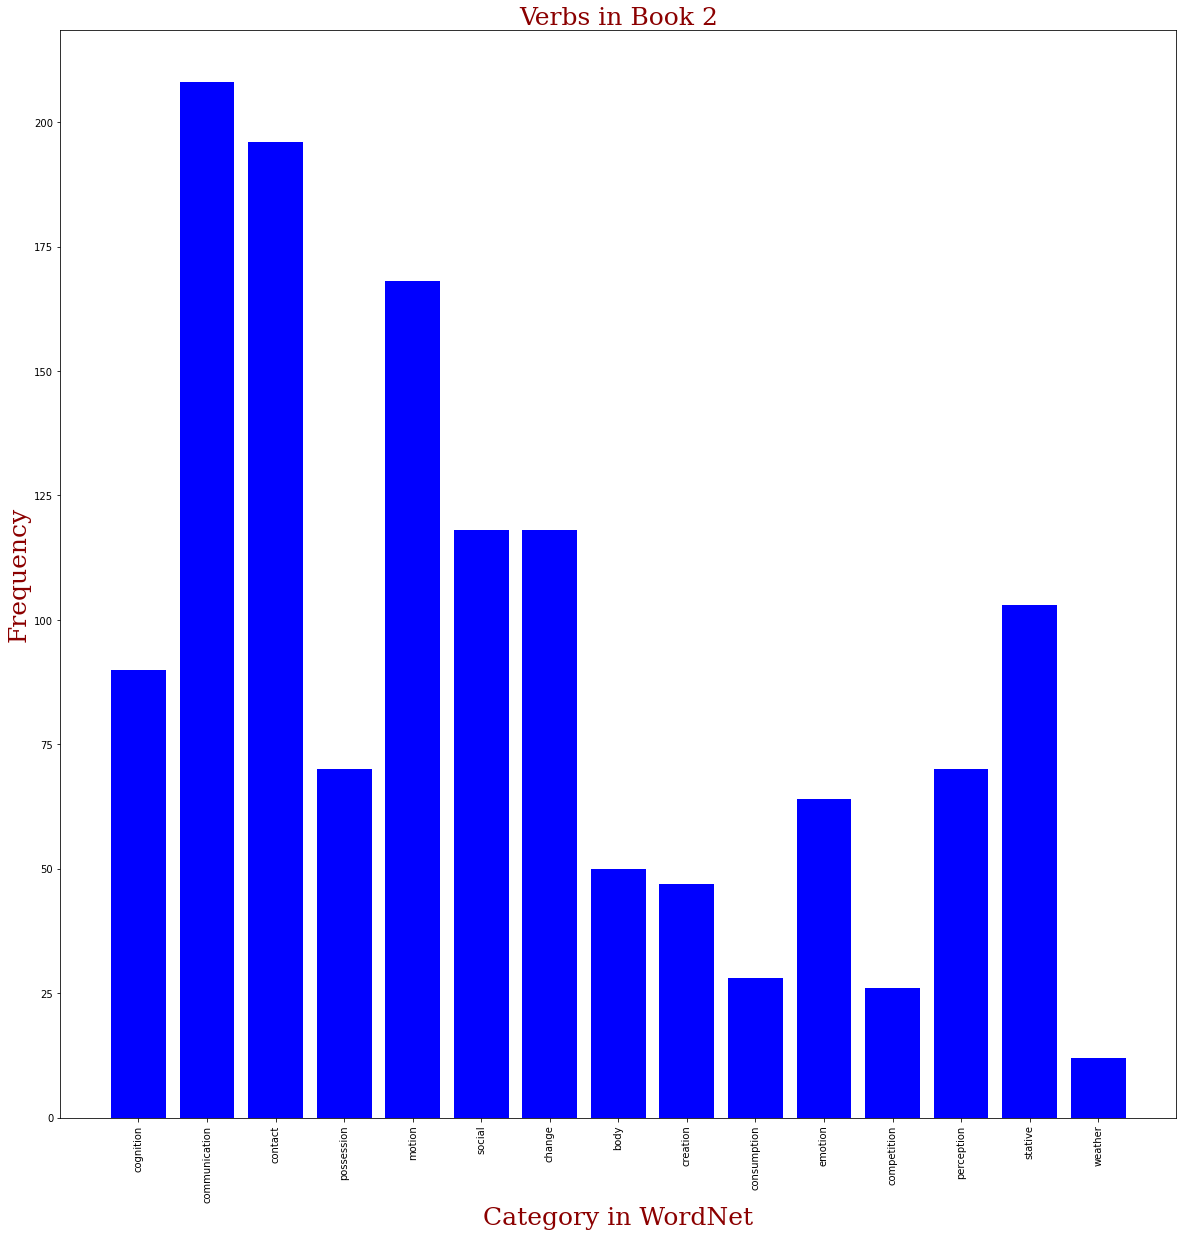

In [29]:
category_list = []
for word in Verbs_B2:
    syn = wordnet.synsets(word, pos = wordnet.VERB)
    if len(syn) > 0:
        category_list.append(syn[0].lexname())

plot_for_frquency_distribution(FreqDist(category_list), "Verbs in Book 2")

In [30]:
# Function to plot histograms of frequencies of different categories of nouns and verbs in the novel
def plot_for_frquency_distribution_NER(fd, title):
    data = {}
    for i in fd.keys():
        if i not in data.keys():
            data[i] = fd[i]
        else:
            data[i] += fd[i]

    X = []
    Y = []

    for i in data.keys():
        X.append(i)
    for i in X:
        Y.append(data[i])

    # Plotting a bar graph for recorded data

    plt.figure(figsize = (20, 20))
    font = {'family':'serif','color':'darkred','size':15}
    plt.bar(X, Y, tick_label=X, width=0.4, color=['blue'])
    plt.xlabel('Category in WordNet', fontdict = font)
    plt.ylabel('Frequency', fontdict = font)
    plt.xticks(rotation=90)
    plt.title(title, fontdict = font, loc = "center")
    plt.show()
    

In [ ]:
entity_list = []
visited = set()
for sent in nltk.sent_tokenize(B1):
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
     if hasattr(chunk, 'label'):
        tmp = ' '.join(c[0] for c in chunk)
        if tmp not in visited:
            visited.add(tmp)
            entity_list.append(chunk.label())
plot_for_frquency_distribution_NER(FreqDist(entity_list), "Frequency Distribution of Entities in Book 1")

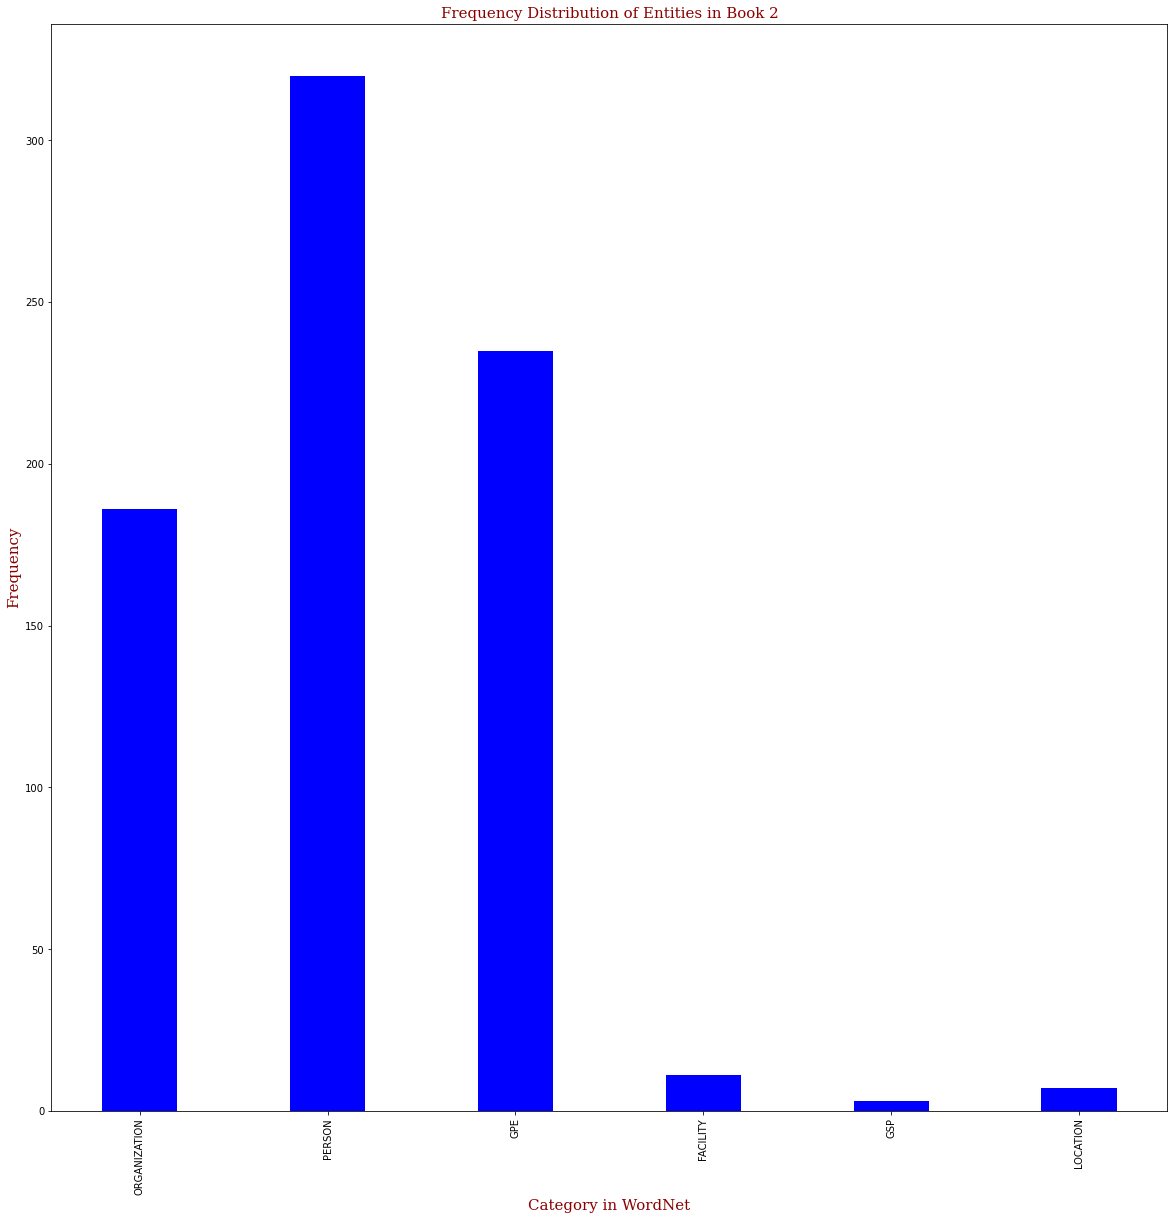

In [32]:
entity_list = []
visited = set()
for sent in nltk.sent_tokenize(B2):
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
     if hasattr(chunk, 'label'):
        tmp = ' '.join(c[0] for c in chunk)
        if tmp not in visited:
            visited.add(tmp)
            entity_list.append(chunk.label())
plot_for_frquency_distribution_NER(FreqDist(entity_list), "Frequency Distribution of Entities in Book 2")

In [33]:
# Testing
def test_for_text(text):
    entity_list = []
    per = set()
    loc = set()
    org = set()
    for sent in nltk.sent_tokenize(text):
      for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
         if hasattr(chunk, 'label'):
                if(chunk.label() == 'PERSON'):
                    per.add(' '.join(c[0] for c in chunk))
                elif (chunk.label() == 'LOCATION'):
                    loc.add(' '.join(c[0] for c in chunk))
                elif (chunk.label() == 'ORGANIZATION'):
                    org.add(' '.join(c[0] for c in chunk))
    print(per)
    print(loc)
    print(org)

In [34]:
text1 = """Mr. Bennet’s property consisted almost entirely in an estate of
      two thousand a year, which, unfortunately for his daughters, was
      entailed, in default of heirs male, on a distant relation; and
      their mother’s fortune, though ample for her situation in life,
      could but ill supply the deficiency of his. Her father had been
      an attorney in Meryton, and had left her four thousand pounds.

      She had a sister married to a Mr. Phillips, who had been a clerk
      to their father, and succeeded him in the business, and a brother
      settled in London in a respectable line of trade.

      The village of Longbourn was only one mile from Meryton; a most
      convenient distance for the young ladies, who were usually
      tempted thither three or four times a week, to pay their duty to
      their aunt and to a milliner’s shop just over the way. The two
      youngest of the family, Catherine and Lydia, were particularly
      frequent in these attentions; their minds were more vacant than
      their sisters’, and when nothing better offered, a walk to
      Meryton was necessary to amuse their morning hours and furnish
      conversation for the evening; and however bare of news the
      country in general might be, they always contrived to learn some
      from their aunt. At present, indeed, they were well supplied both
      with news and happiness by the recent arrival of a militia
      regiment in the neighbourhood; it was to remain the whole winter,
      and Meryton was the headquarters."""
text1 = re.sub(r"[\s]+", " ", text1)
test_for_text(text1)

{'Catherine', 'Mr. Phillips', 'Meryton', 'Mr.', 'Bennet'}
set()
set()


In [35]:
text2 = """Miss Bingley’s attention was quite as much engaged in watching Mr. Darcy’s progress through
his book, as in reading her own; and she was perpetually either making some enquiry, or looking
at his page. She could not win him, however, to any conversation; he merely answered her
question, and read on. At length, quite exhausted by the attempt to be amused with her own
book, which she had only chosen because it was the second volume of his, she gave a great yawn
and said, “How pleasant it is to spend an evening in this way! I declare after all there is no
enjoyment like reading! How much sooner one tires of anything than of a book! When I have a
house of my own, I shall be miserable if I have not an excellent library.”No one made any reply.
She then yawned again, threw aside her book, and cast her eyes round the room in quest for some
amusement; when hearing her brother mentioning a ball to Miss Bennet, she turned suddenly
towards him and said: “By the bye, Charles, are you really serious in meditating a dance at
Netherfield? I would advise you, before you determine on it, to consult the wishes of the present
party; I am much mistaken if there are not some among us to whom a ball would be rather a
punishment than a pleasure.” “If you mean Darcy,” cried her brother, “he may go to bed, if he
chooses, before it begins—but as for the ball, it is quite a settled thing; and as soon as Nicholls
has made white soup enough, I shall send round my cards.”
“I should like balls infinitely better,” she replied, “if they were carried on in a different manner;
but there is something insufferably tedious in the usual process of such a meeting. It would
surely be much more rational if conversation instead of dancing were made the order of the day.”
“Much more rational, my dear Caroline, I dare say, but it would not be near so much like a ball.”"""
text2 = re.sub(r"[\s]+", " ", text2)
test_for_text(text2)

{'Bingley', 'Mr. Darcy', 'Caroline', 'Miss', 'Charles', 'Miss Bennet', 'Darcy', 'Nicholls'}
set()
{'Netherfield'}


In [36]:
text3 = """Sir William stayed only a week at Hunsford, but his visit was long enough to convince him of his
daughter’s being most comfortably settled, and of her possessing such a husband and such a
neighbour as were not often met with. While Sir William was with them, Mr. Collins devoted his
morning to driving him out in his gig, and showing him the country; but when he went away, the
whole family returned to their usual employments, and Elizabeth was thankful to find that they
did not see more of her cousin by the alteration, for the chief of the time between breakfast and
dinner was now passed by him either at work in the garden or in reading and writing, and
looking out of the window in his own book-room, which fronted the road. The room in which the
ladies sat was backwards. Elizabeth had at first rather wondered that Charlotte should not prefer
the dining-parlour for common use; it was a better sized room, and had a more pleasant aspect;
but she soon saw that her friend had an excellent reason for what she did, for Mr. Collins would
undoubtedly have been much less in his own apartment, had they sat in one equally lively; and
she gave Charlotte credit for the arrangement."""
text3 = re.sub(r"[\s]+", " ", text3)
test_for_text(text3)

{'Elizabeth', 'William', 'Mr. Collins', 'Sir William', 'Charlotte', 'Sir'}
set()
{'Hunsford'}


In [37]:
text4 = """Mr. James McCarthy, the only son of the deceased, was then called and gave evidence as
follows: ‘I had been away from home for three days at Bristol, and had only just returned upon
the morning of last Monday, the 3rd. My father was absent from home at the time of my arrival,
and I was informed by the maid that he had driven over to Ross with John Cobb, the groom.
Shortly after my return I heard the wheels of his trap in the yard, and, looking out of my window,
I saw him get out and walk rapidly out of the yard, though I was not aware in which direction he
was going. I then took my gun and strolled out in the direction of the Boscombe Pool, with the
intention of visiting the rabbit warren which is upon the other side. On my way I saw William
Crowder, the game-keeper, as he had stated in his evidence; but he is mistaken in thinking that I
was following my father. I had no idea that he was in front of me. When about a hundred yards
from the pool I heard a cry of “Cooee!” which was a usual signal between my father and myself.
I then hurried forward, and found him standing by the pool. He appeared to be much surprised at
seeing me and asked me rather roughly what I was doing there. A conversation ensued which led
to high words and almost to blows, for my father was a man of a very violent temper. Seeing that
his passion was becoming ungovernable, I left him and returned towards Hatherley Farm. I had
not gone more than 150 yards, however, when I heard a hideous outcry behind me, which caused
me to run back again. I found my father expiring upon the ground, with his head terribly injured.
I dropped my gun and held him in my arms, but he almost instantly expired. I knelt beside him
for some minutes, and then made my way to Mr. Turner’s lodge-keeper, his house being the
nearest, to ask for assistance. I saw no one near my father when I returned, and I have no idea
how he came by his injuries. He was not a popular man, being somewhat cold and forbidding in
his manners, but he had, as far as I know, no active enemies. I know nothing further of the
matter.’"""
text4 = re.sub(r"[\s]+", " ", text4)
test_for_text(text4)

{'James McCarthy', 'Hatherley Farm', 'William Crowder', 'Mr.', 'John Cobb', 'Ross', 'Mr. Turner'}
set()
{'Boscombe Pool'}


In [38]:
text5 = """The papers which Openshaw carried are obviously of vital importance to the person or persons in the
sailing-ship. I think that it is quite clear that there must be more than one of them. A single man could not
have carried out two deaths in such a way as to deceive a coroner’s jury. There must have been several in
it, and they must have been men of resource and determination. Their papers they mean to have, be the
holder of them who it may. In this way you see K. K. K. ceases to be the initials of an individual and
becomes the badge of a society.”“But of what society?”“Have you never—” said Sherlock Holmes,
bending forward and sinking his voice—“have you never heard of the Ku Klux Klan?”
“I never have.”
Holmes turned over the leaves of the book upon his knee. “Here it is,” said he presently:“‘Ku Klux Klan.
A name derived from the fanciful resemblance to the sound produced by cocking a rifle. This terrible
secret society was formed by some ex-Confederate soldiers in the Southern states after the Civil War, and
it rapidly formed local branches in different parts of the country, notably in Tennessee, Louisiana, the
Carolinas, Georgia, and Florida. Its power was used for political purposes, principally for the terrorising
of the negro voters and the murdering and driving from the country of those who were opposed to its
views. Its outrages were usually preceded by a warning sent to the marked man in some fantastic but
generally recognised shape—a sprig of oak-leaves in some parts, melon seeds or orange pips in others. On
receiving this the victim might either openly abjure his former ways, or might fly from the country. If he
braved the matter out, death would unfailingly come upon him, and usually in some strange and
unforeseen manner. So perfect was the organisation of the society, and so systematic its methods, that
there is hardly a case upon record where any man succeeded in braving it with impunity, or in which any
of its outrages were traced home to the perpetrators. For some years the organisation flourished in spite of
the efforts of the United States government and of the better classes of the community in the South.
Eventually, in the year 1869, the movement rather suddenly collapsed, although there have been sporadic
outbreaks of the same sort since that date.’"""
text5 = re.sub(r"[\s]+", " ", text5)
test_for_text(text5)

{'Louisiana', 'Sherlock Holmes', 'Openshaw', 'Holmes'}
{'South'}
{'Carolinas'}


In [39]:
text6 = """“Hotel Cosmopolitan Jewel Robbery. John Horner, 26, plumber, was brought up upon the charge
of having upon the 22nd inst., abstracted from the jewel-case of the Countess of Morcar the
valuable gem known as the blue carbuncle. James Ryder, upper-attendant at the hotel, gave his
evidence to the effect that he had shown Horner up to the dressing-room of the Countess of
Morcar upon the day of the robbery in order that he might solder the second bar of the grate,
which was loose. He had remained with Horner some little time, but had finally been called
away. On returning, he found that Horner had disappeared, that the bureau had been forced open,
and that the small morocco casket in which, as it afterwards transpired, the Countess was
accustomed to keep her jewel, was lying empty upon the dressing-table. Ryder instantly gave the
alarm, and Horner was arrested the same evening; but the stone could not be found either upon
his person or in his rooms. Catherine Cusack, maid to the Countess, deposed to having heard
Ryder’s cry of dismay on discovering the robbery, and to having rushed into the room, where she
found matters as described by the last witness. Inspector Bradstreet, B division, gave evidence as
to the arrest of Horner, who struggled frantically, and protested his innocence in the strongest
terms. Evidence of a previous conviction for robbery having been given against the prisoner, the
magistrate refused to deal summarily with the offence, but referred it to the Assizes. Horner, who
had shown signs of intense emotion during the proceedings, fainted away at the conclusion and
was carried out of court.“Hum! So much for the police-court,” said Holmes thoughtfully, tossing
aside the paper. “The question for us now to solve is the sequence of events leading from a rifled
jewel-case at one end to the crop of a goose in Tottenham Court Road at the other."""
text6 = re.sub(r"[\s]+", " ", text6)
test_for_text(text6)

{'Catherine', 'Horner', 'John Horner', 'Holmes', 'Hotel Cosmopolitan Jewel Robbery', 'Ryder', 'James'}
set()
{'Assizes', 'Countess', 'Cusack', 'Tottenham Court Road'}


In [40]:
def lower_and_remove_punctuation(str):
    
    # Converting entire string to lowercase
    str = str.lower()
    
    # Removing all punctuations by replacing everyhting other than whitespace characters, a-z, A-Z, 0-9 and '_' by empty string 
    # followed by replacing '_' by empty string
    str = re.sub(r"[^\w\s]", "", str)
    str = re.sub(r"_", "", str)
    
    return str

In [41]:
# Book 3 is Emma stored in string B3
book_one_path = "E:/Emma.txt"
Original_B3 = txt_file_to_string(book_one_path)
Original_B3

'The Project Gutenberg eBook of Emma, by Jane Austen  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: Emma  Author: Jane Austen  Release Date: August, 1994 [eBook #158] [Most recently updated: December 14, 2021]  Language: English   Produced by: An Anonymous Volunteer and David Widger  *** START OF THE PROJECT GUTENBERG EBOOK EMMA ***     Emma  by Jane Austen   Contents   VOLUME I.  CHAPTER I.  CHAPTER II.  CHAPTER III.  CHAPTER IV.  CHAPTER V.  CHAPTER VI.  CHAPTER VII.  CHAPTER VIII.  CHAPTER IX.  CHAPTER X.  CHAPTER XI.  CHAPTER XII.  CHAPTER XIII.  CHAPTER XIV.  CHAPTER XV.  CHAPTER XVI

In [42]:
# Pre-processing B3
B3 = pre_process(Original_B3)
B3 = lower_and_remove_punctuation(B3)
B3

' start of the project gutenberg ebook emma  emma by jane austen contents volume i i ii iii iv v vi vii viii ix x xi xii xiii xiv xv xvi xvii xviii volume ii i ii iii iv v vi vii viii ix x xi xii xiii xiv xv xvi xvii xviii volume iii i ii iii iv v vi vii viii ix x xi xii xiii xiv xv xvi xvii xviii xix volume i i emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses 

In [43]:
B1 = lower_and_remove_punctuation(B1)
B2 = lower_and_remove_punctuation(B2)

In [44]:
from pathlib import Path

all_txt_files =[]
for file in Path("E:/New Data/NLP Project").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)

n_files = len(all_txt_files)

In [45]:
all_docs = []
for txt_file in all_txt_files:
    with open(txt_file, encoding="utf8") as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)
    
all_docs

[]

In [46]:
#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
transformed_documents = vectorizer.fit_transform(all_docs)
transformed_documents_as_array = transformed_documents.toarray()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
x = len(transformed_documents_as_array[0])
num = 0
# x = 100
for i in range (0, x):
    num += transformed_documents_as_array[0][i] * transformed_documents_as_array[1][i]

den1 = 0
for i in range (0, x):
    den1 += transformed_documents_as_array[0][i] * transformed_documents_as_array[0][i]
den1 = den1 ** 0.5

den2 = 0
for i in range (0, x):
    den2 += transformed_documents_as_array[1][i] * transformed_documents_as_array[1][i]
den2 = den2 ** 0.5

den = den1 * den2
print(num/ den)

In [ ]:
x = len(transformed_documents_as_array[0])
num = 0
# x = 100
for i in range (0, x):
    num += transformed_documents_as_array[0][i] * transformed_documents_as_array[2][i]

den1 = 0
for i in range (0, x):
    den1 += transformed_documents_as_array[0][i] * transformed_documents_as_array[0][i]
den1 = den1 ** 0.5

den2 = 0
for i in range (0, x):
    den2 += transformed_documents_as_array[2][i] * transformed_documents_as_array[2][i]
den2 = den2 ** 0.5

den = den1 * den2
print(num/ den)

In [ ]:
x = len(transformed_documents_as_array[0])
num = 0
# x = 100
for i in range (0, x):
    num += transformed_documents_as_array[1][i] * transformed_documents_as_array[2][i]

den1 = 0
for i in range (0, x):
    den1 += transformed_documents_as_array[1][i] * transformed_documents_as_array[1][i]
den1 = den1 ** 0.5

den2 = 0
for i in range (0, x):
    den2 += transformed_documents_as_array[2][i] * transformed_documents_as_array[2][i]
den2 = den2 ** 0.5

den = den1 * den2
print(num/ den)